In [6]:
library("here")
library(devtools)
library(Seurat)

load_all('/home/jpm73279/Socrates')

ℹ Loading Socrates
Warning message:
"replacing previous import 'scales::viridis_pal' by 'viridis::viridis_pal' when loading 'Socrates'"


In [2]:
# bed <- system.file("extdata", "test.tn5.bed.gz", package = "Socrates")
#ann <- system.file("extdata", "gencode.v19.annotation.gff3.gz", package = "Socrates")
#chr <- system.file("extdata", "hg19.txt", package = "Socrates")

reference_genome_path <- "/home/jpm73279/genome_downloads/Sbicolor.v5.1.prelim.annot/"
analysis_path <- "/scratch/jpm73279/comparative_single_cell/01.alignments_annotations/sorghum_bicolor/"

sb_leaf_rep_1 <- paste0(analysis_path, "Sorghum_leaf.sciATAC_rep1.unique.tn5.bed")

# set-up arguments

#ann <- "Zm-B73-REFERENCE-NAM-5.0_Zm00001eb.1.nuclear.gff3"
#chr <- "Zm-B73-REFERENCE-NAM-5.0.chrom.size"
#pre <- "Sb.Leaf_rep1"
#output <- as.character(args[5])

ann <- paste0(reference_genome_path,"Sbicolorv5.1.primaryTrs.gff3")
chr <- paste0(reference_genome_path,"Sorghum_bicolor_var_BTx623.chrom.size")
pre <- "Sb.Leaf_rep1.QC_v2"



#Load Object
sb_leaf_rep_1 <- loadBEDandGenomeData(sb_leaf_rep_1, ann, chr)
#zea_m.rep.peaks  <- paste0(pre, "macs2_temp", sep=".")

Running pre-check on input files and executable paths ...

BED file path = /scratch/jpm73279/comparative_single_cell/01.alignments_annotations/sorghum_bicolor/Sorghum_leaf.sciATAC_rep1.unique.tn5.bed ... ok

GFF file path = /home/jpm73279/genome_downloads/Sbicolor.v5.1.prelim.annot/Sbicolorv5.1.primaryTrs.gff3 ... ok

Chromosome sizes file path = /home/jpm73279/genome_downloads/Sbicolor.v5.1.prelim.annot/Sorghum_bicolor_var_BTx623.chrom.size ... ok

Macs2 is installed .... ok

 - loading data (this may take obj while for big BED files) ...

 - finished loading data



In [7]:
sb_leaf_rep_1.no_organelle <- countRemoveOrganelle(sb_leaf_rep_1, 
                                             org_scaffolds = c("Pt", "Mt"), 
                                             remove_reads = TRUE)

Identified 4238986 organeller reads ...



In [8]:
# call ACRs
sb_temp_dir <- paste0(analysis_path, "sb_peaks.3.tmp")
sb_leaf_rep_1.no_organelle <- callACRs(sb_leaf_rep_1.no_organelle, genomesize=1.8e8,
                shift= -50,
                extsize=100,
                fdr=0.05,
                tempdir=sb_temp_dir,
                verbose=T)

 - running MACS2 on bulk BED file ...

Warning message in dir.create(mac2temp):
"'/scratch/jpm73279/comparative_single_cell/01.alignments_annotations/sorghum_bicolor/sb_peaks.3.tmp' already exists"


In [9]:
sb_leaf_rep_1.meta <- buildMetaData(sb_leaf_rep_1.no_organelle,
                                     tss.window=2000,
                                     verbose=TRUE,
                                     organelle_scaffolds= c("Pt", "Mt"))

 - counting Tn5 sites per barcode ...

 - removing organelle scaffolds from annotation ...

 - counting Tn5 sites at TSSs per barcode ...

 - counting Tn5 sites within ACRs per barcode ...

 - finalizing meta data creation ...

   ~ returning metadata ...




Attaching package: 'dplyr'


The following object is masked from 'package:MASS':

    select


The following object is masked from 'package:AnnotationDbi':

    select


The following object is masked from 'package:matrixStats':

    count


The following objects are masked from 'package:GenomicRanges':

    intersect, setdiff, union


The following object is masked from 'package:GenomeInfoDb':

    intersect


The following objects are masked from 'package:IRanges':

    collapse, desc, intersect, setdiff, slice, union


The following objects are masked from 'package:S4Vectors':

    first, intersect, rename, setdiff, setequal, union


The following object is masked from 'package:Biobase':

    combine


The following objects are masked from 'package:BiocGenerics':

    combine, intersect, setdiff, union


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




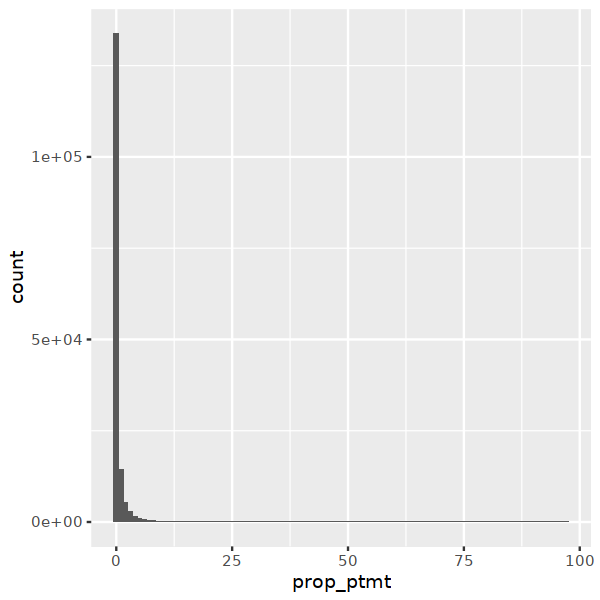

In [10]:
options(repr.plot.width=5, repr.plot.height=5)
library("dplyr")
sb_leaf_rep_1.meta$meta  %>% 
    dplyr::mutate(prop_ptmt = ptmt/total)  %>% 
    ggplot(., aes(prop_ptmt)) + geom_histogram(binwidth = 1)

Warning message:
"package 'repr' was built under R version 4.2.1"
Making Dotplot

... Filtering Cells based of Oragnelle Reads



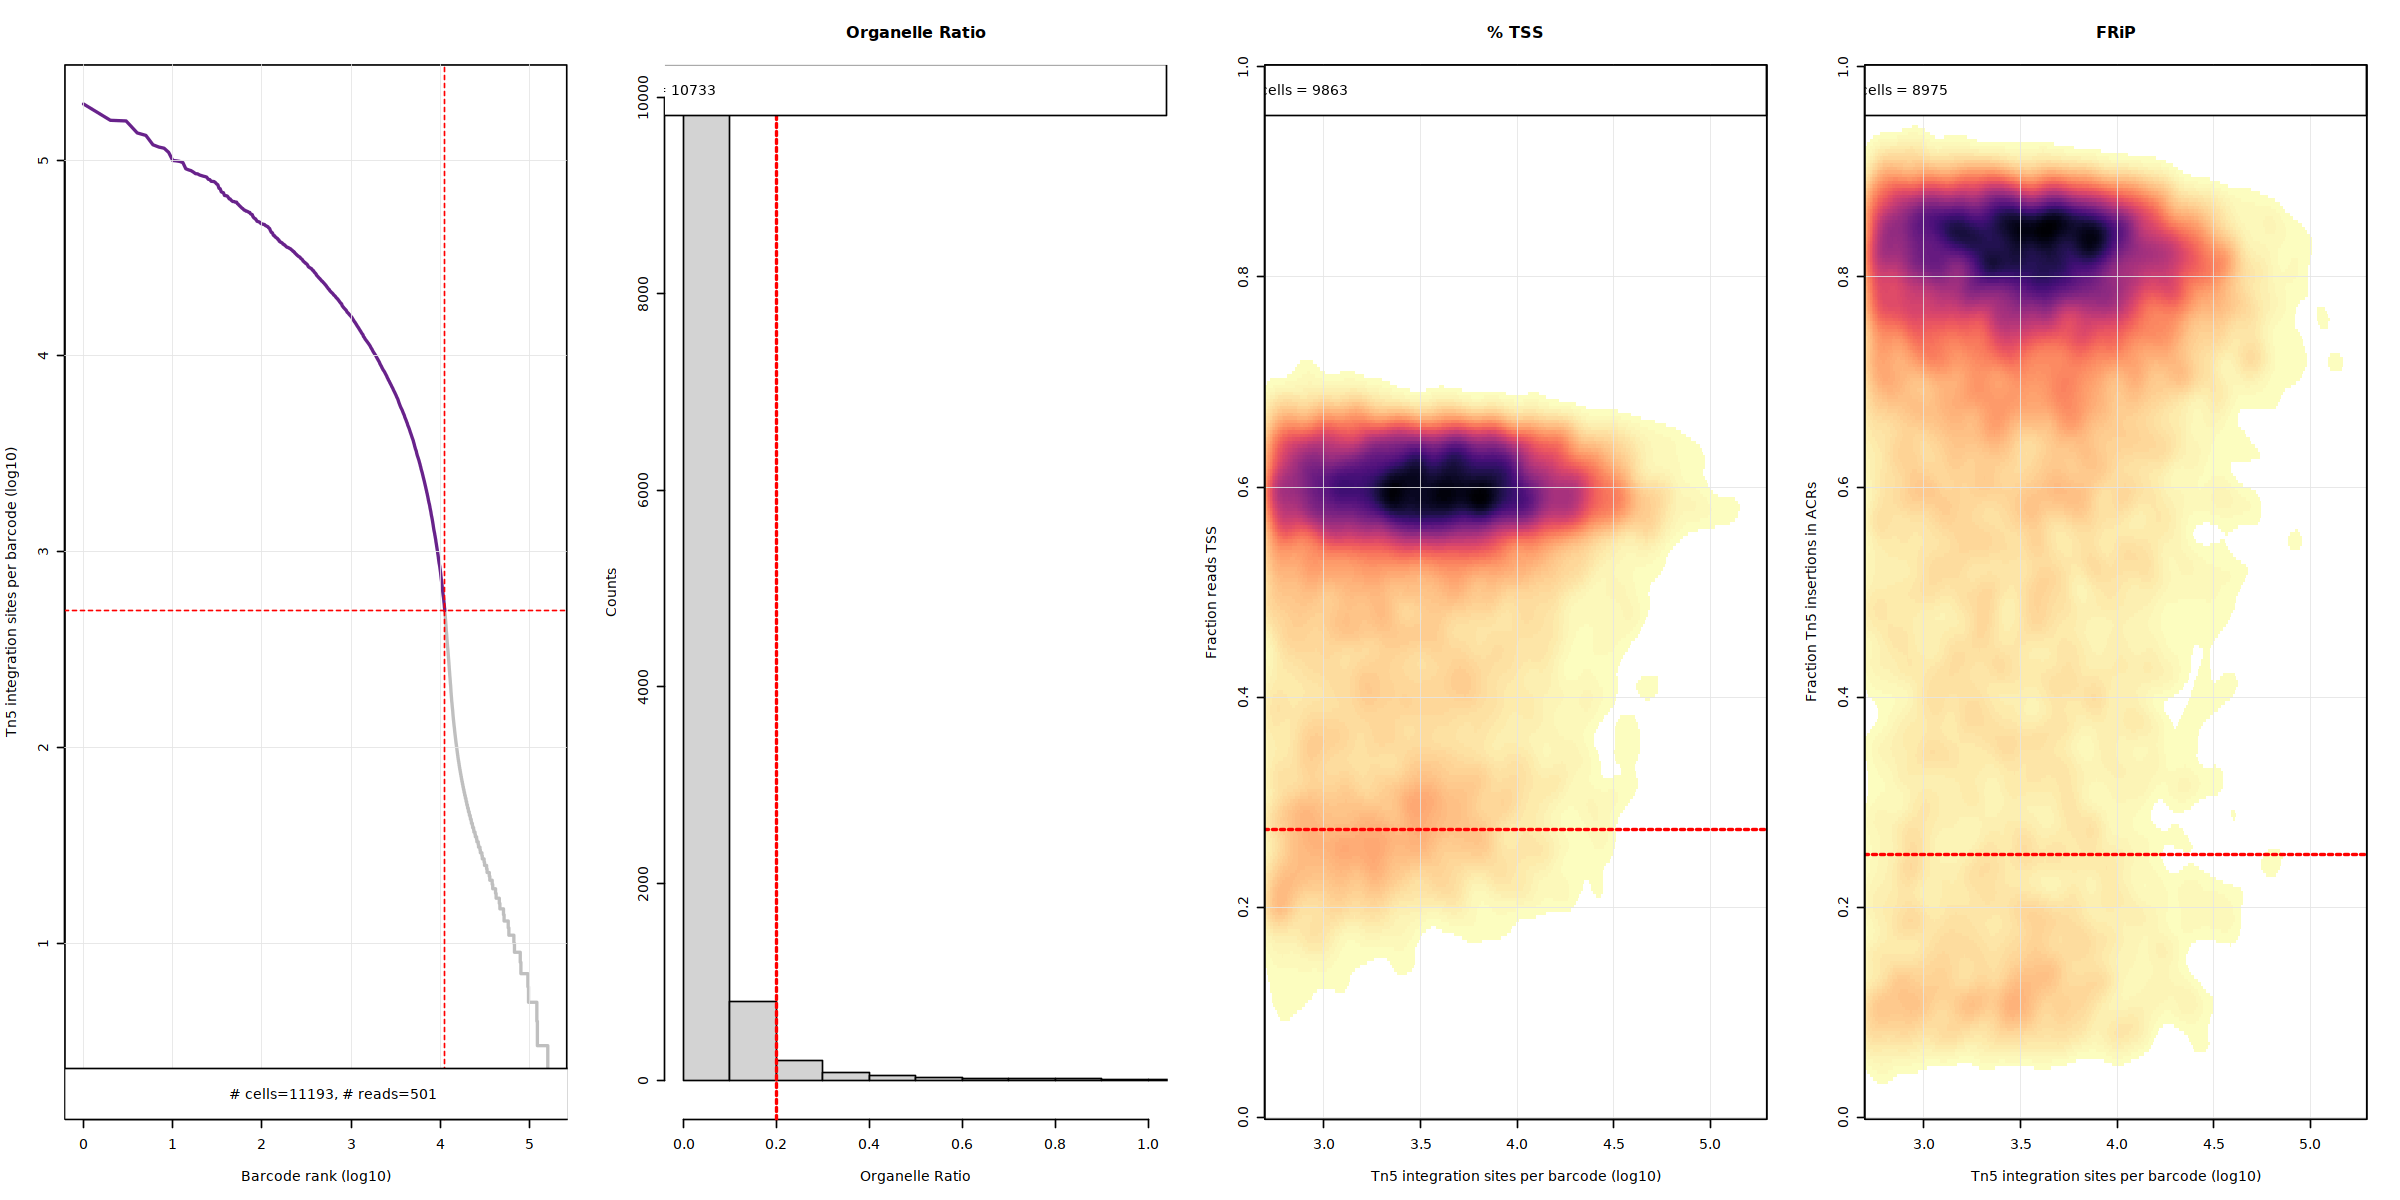

In [11]:
library(repr)

options(repr.plot.width=20, repr.plot.height=10)
sb_leaf_rep_1.meta <- findCells(sb_leaf_rep_1.meta,
                                        doplot=T,
                                        set.tn5.cutoff=500,
                                        max.cells=20000,
                                        min.tn5=500,
                                        filt.tss=TRUE,
                                        filt.frip=TRUE,
                                        #tss.z.thresh=3,
                                        tss.min.freq=.15,
                                        frip.min.freq=0.15,
                                        filt.org = TRUE,
                                        org.filter.thresh=0.2,
                                        prefix=NULL)


In [12]:
# generate sparse matrix
sb_leaf_rep_1.meta.filtererd <- generateMatrix(sb_leaf_rep_1.meta,
                            filtered=FALSE,
                            windows=250,
                            peaks=FALSE,
                            organelle_scaffolds= c("Pt", "Mt"),
                            blacklist = "/home/jpm73279/genome_downloads/Sbicolor.v5.1.prelim.annot/sb_prelim.final_blacklist.bed",
                            verbose=T)

#rm(zea_m.Crown_root_1.obj.filtered, zea_m.Crown_root_1.obj.meta, zea_m.Crown_root_1.obj.no_organelle)

In [13]:
sb_leaf_rep_1.meta.filtererd <- isCell(sb_leaf_rep_1.meta.filtererd,
      num.ref = 5000, verbose = TRUE)

 - converting triplet format to sparseMatrix

 - setting filters

 - parsing initial boundaries

 - normalizing distributions and creating references

 - performing feature selection (this step is a bottle-neck and may take a while to complete)

 - estimating correlations



In [262]:
save_path <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/sorghum_bicolor/QC_output"

[1] "Sb.Leaf_rep1.QC_v2"

In [263]:
passing_cells <- sb_leaf_rep_1.meta.filtererd$meta  %>% 
    dplyr::filter(is_cell == 1)



[1] 19305    17

In [264]:
sb_leaf_rep_1.meta.filtererd$meta.v3 <- passing_cells
    

In [265]:
save_path <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/sorghum_bicolor/QC_output"

In [269]:
#pre <- "Sb.Leaf_rep1.QC_v2"
# convert to Socrates format for downstream analysis.-
sb_leaf_rep_1.filtered.sparse <- convertSparseData(sb_leaf_rep_1.meta.filtererd,
                             verbose=T)

#pre <- "Zea_mays_tis_crown_root_rep_1"
sb.obj.leaf_rep_1.save  <- paste0(save_path,"/",pre, "_QC_obj.rds")
sb.soc.leaf_rep_1.save  <- paste0(save_path,"/",pre, "_QC_soc_obj.rds")


# save QC object
saveRDS(sb_leaf_rep_1.meta.filtererd, file=sb.obj.leaf_rep_1.save)
saveRDS(sb_leaf_rep_1.filtered.sparse, file=sb.soc.leaf_rep_1.save)

 - converting triplet format to sparseMatrix



# Take QC Metrics for Excel

In [1]:
analysis_path <- "/scratch/jpm73279/comparative_single_cell/01.alignments_annotations/sorghum_bicolor/"


sb_replicate_1 <- readRDS("/scratch/jpm73279/comparative_single_cell/02.QC_clustering/sorghum_bicolor/QC_output/Sb.Leaf_rep1_QC_soc_obj.rds")
sb_replicate_2 <- readRDS("/scratch/jpm73279/comparative_single_cell/02.QC_clustering/sorghum_bicolor/QC_output/Sb.Leaf_rep2_QC_soc_obj.rds")

In [270]:
mean(sb_leaf_rep_1.filtered.sparse$meta$total)

[1] 3552.25

In [271]:
mean(sb_leaf_rep_1.filtered.sparse$meta$tss)

[1] 1940.266

In [272]:
mean(sb_leaf_rep_1.filtered.sparse$meta$acrs)

[1] 2383.729

In [273]:
mean(sb_leaf_rep_1.filtered.sparse$meta$nSites)

[1] 2251.543

In [274]:
dim(sb_leaf_rep_1.filtered.sparse$meta)

[1] 19305    17